# Random Forest Algorithm 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

# check all categorical features

In [7]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [10]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [11]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [12]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [13]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Unmarried', 'Single')

In [14]:
# check for any missing values 
features_with_nan = [features for features in df.columns if df[features].isnull().sum()>=1]
print(features_with_nan)
for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean()*100, 5))

['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [15]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
# statistical summary of numerical features
df[features_with_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values
1. Impute Median to Age 
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberOfFollowups as it is a Discrete Feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberOfTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for Monthly Income

In [17]:
df.Age.fillna(df.Age.median(), inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)


In [18]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [19]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [20]:
df.drop('CustomerID', inplace=True, axis=1)

In [21]:
df.head

<bound method NDFrame.head of       ProdTaken   Age  ...     Designation  MonthlyIncome
0             1  41.0  ...         Manager        20993.0
1             0  49.0  ...         Manager        20130.0
2             1  37.0  ...       Executive        17090.0
3             0  33.0  ...       Executive        17909.0
4             0  36.0  ...       Executive        18468.0
...         ...   ...  ...             ...            ...
4883          1  49.0  ...         Manager        26576.0
4884          1  28.0  ...       Executive        21212.0
4885          1  52.0  ...  Senior Manager        31820.0
4886          1  19.0  ...       Executive        20289.0
4887          1  36.0  ...       Executive        24041.0

[4888 rows x 19 columns]>

## Feature Engineering

In [22]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [23]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [24]:
df.drop(['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], inplace=True, axis=1)

In [25]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [26]:
## get all teh numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Number of Categorial Features: ", len(num_features))

Number of Categorial Features:  12


In [27]:
# number of Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Number of Continious Features: ", len(cat_features))

Number of Continious Features:  6


In [28]:
# number of Discrete features
discrete_features = [feature for feature in df.columns if len(df[feature].unique()) <= 25]
print("Number of Discrete Features: ", len(discrete_features))

Number of Discrete Features:  15


In [29]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [30]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [31]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [32]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((3421, 17), (1467, 17))

In [34]:
cat_features_ = X.select_dtypes(include="object").columns
num_features_ = X.select_dtypes(exclude="object").columns

In [35]:
print(cat_features)
print(cat_features_)
print(num_features)
print(num_features_)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')
['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']
Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')


In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features_),
        ("StandardScaler", numeric_transformer, num_features_)
    ]
)

In [37]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [38]:
X_train

array([[ 1.        ,  0.        ,  1.        , ...,  0.78143477,
         0.4603181 , -0.06786916],
       [ 1.        ,  1.        ,  0.        , ..., -1.27969734,
        -1.00566841, -0.777901  ],
       [ 1.        ,  0.        ,  1.        , ...,  0.78143477,
        -1.2097217 , -0.06786916],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78143477,
        -0.35739958,  0.64216267],
       [ 1.        ,  0.        ,  0.        , ...,  0.78143477,
        -0.25076528,  0.64216267],
       [ 0.        ,  0.        ,  1.        , ..., -1.27969734,
        -1.07168012, -1.48793284]], shape=(3421, 26))

### Random Forest Classifier Training Model

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [53]:
models={
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train Model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set parameter
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred)

    # testing set parameters
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("-- Model Performance on Training Data")
    print(" - Accuracy- ", model_train_accuracy)
    print(" - Model F1 Score- ", model_train_f1)
    print(" - Precision- ", model_train_precision)
    print(" - Recall- ", model_train_recall)
    print(" - Model ROC AUC- ", model_train_roc_auc)

    print("  ----------------------------------------   ")

    print("-- Model Performance on Testing Data")
    print(" - Accuracy- ", model_test_accuracy)
    print(" - Model F1 Score- ", model_test_f1)
    print(" - Precision- ", model_test_precision)
    print(" - Recall- ", model_test_recall)
    print(" - Model ROC AUC- ", model_test_roc_auc)

    print("  =========================================  ")
    print()

DecisionTreeClassifier
-- Model Performance on Training Data
 - Accuracy-  1.0
 - Model F1 Score-  1.0
 - Precision-  1.0
 - Recall-  1.0
 - Model ROC AUC-  1.0
  ----------------------------------------   
-- Model Performance on Testing Data
 - Accuracy-  0.9025221540558964
 - Model F1 Score-  0.9032555002382067
 - Precision-  0.7298245614035088
 - Recall-  0.7591240875912408
 - Model ROC AUC-  0.8472904595542122

Random Forest
-- Model Performance on Training Data
 - Accuracy-  1.0
 - Model F1 Score-  1.0
 - Precision-  1.0
 - Recall-  1.0
 - Model ROC AUC-  1.0
  ----------------------------------------   
-- Model Performance on Testing Data
 - Accuracy-  0.9229720518064076
 - Model F1 Score-  0.9165448214253269
 - Precision-  0.9447513812154696
 - Recall-  0.6240875912408759
 - Model ROC AUC-  0.8078526807838915

AdaBoostClassifier
-- Model Performance on Training Data
 - Accuracy-  0.8433206664717918
 - Model F1 Score-  0.8083627668421971
 - Precision-  0.7696078431372549
 - Rec

In [49]:
# hyperparamter tunning
rf_params = {
    "max_depth": [None, 5, 8, 10, 15],
    "max_features": [2, 4, 7, 8, 10, 12, 'auto'],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}

adaboost_params = {
    "n_estimators": [50, 60, 70, 80, 90, 100],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0]
}


model_list_for_hyperparamter_tunning = [
    ("RF", RandomForestClassifier(), rf_params),
    ("AB", AdaBoostClassifier(), adaboost_params)
]



In [50]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}
for name, model, params in model_list_for_hyperparamter_tunning:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )

    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"------------- Best Params for {model_name} ------------------")
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=2, min_samples_split=20, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, max_features=2, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=2, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=12, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=12, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=12, min_samp

In [51]:
models={
    "Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=12, max_depth=None),
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=90, learning_rate=1.0)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train Model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set parameter
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred)

    # testing set parameters
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("-- Model Performance on Training Data")
    print(" - Accuracy- ", model_train_accuracy)
    print(" - Model F1 Score- ", model_train_f1)
    print(" - Precision- ", model_train_precision)
    print(" - Recall- ", model_train_recall)
    print(" - Model ROC AUC- ", model_train_roc_auc)

    print("  ----------------------------------------   ")

    print("-- Model Performance on Testing Data")
    print(" - Accuracy- ", model_test_accuracy)
    print(" - Model F1 Score- ", model_test_f1)
    print(" - Precision- ", model_test_precision)
    print(" - Recall- ", model_test_recall)
    print(" - Model ROC AUC- ", model_test_roc_auc)

    print("  =========================================  ")
    print()

Random Forest
-- Model Performance on Training Data
 - Accuracy-  1.0
 - Model F1 Score-  1.0
 - Precision-  1.0
 - Recall-  1.0
 - Model ROC AUC-  1.0
  ----------------------------------------   
-- Model Performance on Testing Data
 - Accuracy-  0.9338786639400136
 - Model F1 Score-  0.9303062676185758
 - Precision-  0.9234449760765551
 - Recall-  0.7043795620437956
 - Model ROC AUC-  0.8454839972834234

AdaBoostClassifier
-- Model Performance on Training Data
 - Accuracy-  0.8529669687225957
 - Model F1 Score-  0.8263216521452076
 - Precision-  0.7760617760617761
 - Recall-  0.3111455108359133
 - Model ROC AUC-  0.6451223049675062
  ----------------------------------------   
-- Model Performance on Testing Data
 - Accuracy-  0.8411724608043627
 - Model F1 Score-  0.812628771374051
 - Precision-  0.6846846846846847
 - Recall-  0.2773722627737226
 - Model ROC AUC-  0.6240172294589484



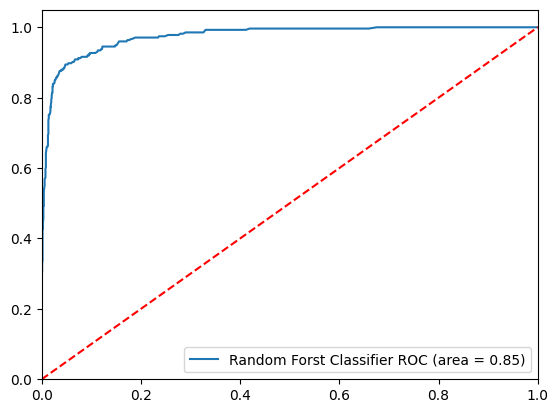

In [44]:
# plot roc auc score
from sklearn.metrics import roc_curve
plt.figure()

auc_models = [
    {
        'label': 'Random Forst Classifier',
        'model': RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=12, max_depth=None),
        'auc': 0.8481
    }
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.savefig('auc.png')
plt.show()